In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier

In [2]:
file_path = "NFLX.csv"

data_frame = pd.read_csv(file_path)

In [3]:
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [6]:
## Cleaning the data of missing values
data_frame.dropna(inplace=True)

In [7]:
## Storing the stock movement (up or down) for data analysis
data_frame['Trend'] = (data_frame['Close']-data_frame['Open']).apply(lambda x: 1 if x>0 else 0)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
 7   Trend      1009 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 63.2+ KB


In [9]:
data_frame.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,0
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,0


In [10]:
## List of features to be used for the model
data_features = ['Open', 'Close', 'High', 'Low','Volume']

## Extracting input features(X) and target variable(y)
X = data_frame[data_features]
y= data_frame['Trend']

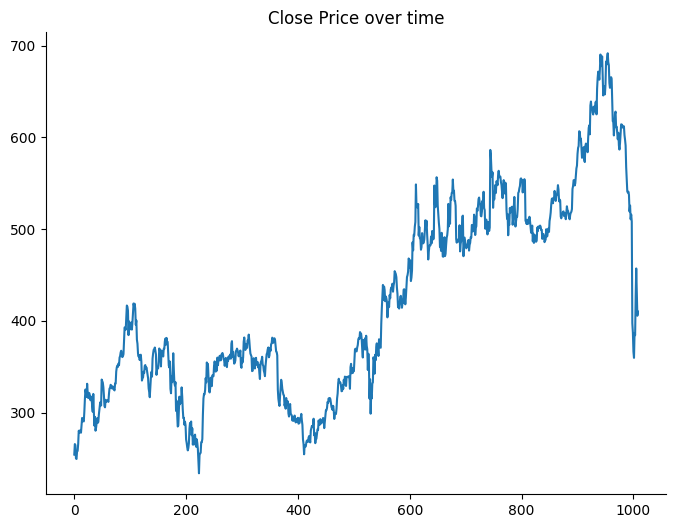

In [11]:
## PLotting the data
X['Close'].plot(kind='line', figsize=(8,6), title='Close Price over time')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Splitting the data into training data and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [15]:
from sklearn.preprocessing import StandardScaler
import joblib

#Initializing the StandardScaler
standard_scaler = StandardScaler()

## Scaling and transforming the training data using StandardScaler
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

#Saving the scaler
joblib.dump(standard_scaler,'scaler.pkl')

['scaler.pkl']

In [16]:
## Building the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

## Initializing the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Training the model on scaled data
random_forest_model.fit(X_train_scaled, y_train)

## Saving the Random Forest Model
joblib.dump(random_forest_model,'rfmodel.pkl')

## Making predictions on the testing data
rf_model_predictions = random_forest_model.predict(X_test_scaled)

In [17]:
rf_model_predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0])

In [18]:
## Creating the confusion matrix for random forest model
rf_model_confusion_matrix = confusion_matrix(y_test, rf_model_predictions)

rf_model_confusion_matrix

array([[85, 21],
       [22, 74]])

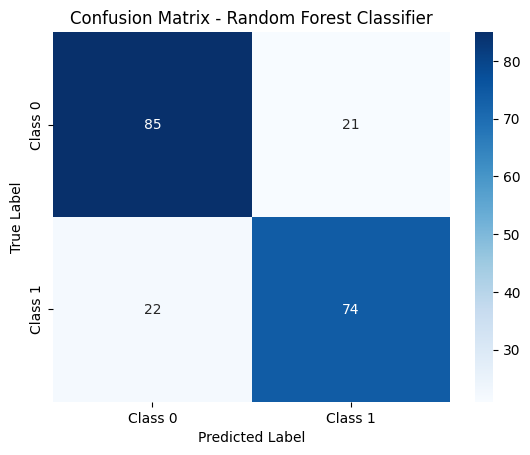

In [20]:
import seaborn as sns

sns.heatmap(rf_model_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
## Model evaluation
rf_model_accuracy = accuracy_score(y_test, rf_model_predictions)
rf_model_precision = precision_score(y_test, rf_model_predictions)
rf_model_recall_score = recall_score(y_test, rf_model_predictions)
rf_model_f1_score = f1_score(y_test, rf_model_predictions)

print('Random Forest Model:\n')
print(f"Accuracy: {rf_model_accuracy:.4f}")
print(f"Precision: {rf_model_precision:.4f}")
print(f"Recall: {rf_model_recall_score:.4f}")
print(f"F1 Score: {rf_model_f1_score:.4f}")

Random Forest Model:

Accuracy: 0.7871
Precision: 0.7789
Recall: 0.7708
F1 Score: 0.7749


In [22]:
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV for hyperparameter tuning of the random forest model 

## Parameter grid for the hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

## Initializing GridSearchCV with random forest classifier and defined parameter grid
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')

## Performing Grid Search on training data
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Parameters: ",grid_search_rf.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [23]:
## Retrieving the optimized random forest model using the optimal hyperparameters from grid search
optimized_rf_model = grid_search_rf.best_estimator_

optimized_rf_pred = optimized_rf_model.predict(X_test_scaled)

In [24]:
optimized_rf_accuracy = accuracy_score(y_test, optimized_rf_pred)
optimized_rf_precision = precision_score(y_test, optimized_rf_pred)
optimized_rf_recall = recall_score(y_test, optimized_rf_pred)
optimized_rf_f1 = f1_score(y_test, optimized_rf_pred)

print(f"Accuracy: {optimized_rf_accuracy:.2f}")
print(f"Precision: {optimized_rf_precision:.2f}")
print(f"Recall: {optimized_rf_recall:.2f}")
print(f"F1 Score: {optimized_rf_f1:.2f}")

Accuracy: 0.81
Precision: 0.80
Recall: 0.81
F1 Score: 0.80


In [25]:
## Constructing SVM Model
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

##Initializing Support Vector Classifier Model
svc_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42, probability=True)

svc_model.fit(X_train_scaled, y_train)

## Saving the Random Forest Model
joblib.dump(svc_model,'svm_model.pkl')

svc_model_predictions = svc_model.predict(X_test_scaled)

In [26]:
svc_accuracy_score = accuracy_score(y_test, svc_model_predictions)
svc_precision_score = precision_score(y_test, svc_model_predictions)
svc_recall_score = recall_score(y_test, svc_model_predictions)
svc_f1_score = f1_score(y_test, svc_model_predictions)

In [27]:
print(f"Accuracy: {svc_accuracy_score:.2f}")
print(f"Precision: {svc_precision_score:.2f}")
print(f"Recall: {svc_recall_score:.2f}")
print(f"F1 Score: {svc_f1_score:.2f}")

Accuracy: 0.63
Precision: 0.61
Recall: 0.60
F1 Score: 0.61


In [28]:
## building the confusion matrix for svm model
svc_model_confusion_matrix = confusion_matrix(y_test, svc_model_predictions)

svc_model_confusion_matrix

array([[69, 37],
       [38, 58]])

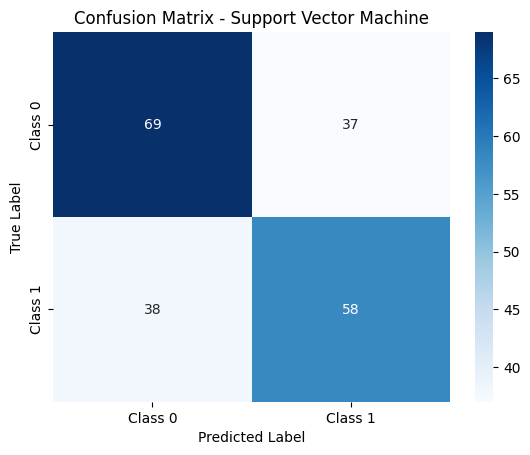

In [29]:
import seaborn as sns

sns.heatmap(svc_model_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [30]:
## Using GridSearchCV for hyperparameter tuning of the SVM model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## parameter grid for the SVC hyperparameter tuning
param_grid = {
        'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

## Initialize GridSerachCV with Support Vector Classifier and defined parameter grid
grid_search = GridSearchCV(SVC(random_state=42, probability=True), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

## Applying grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

In [31]:
optimized_svc_model = grid_search.best_estimator_

optimized_svc_model

SVC(C=10, gamma=1, kernel='poly', probability=True, random_state=42)

In [33]:
optimized_svc_predictions = optimized_svc_model.predict(X_test_scaled)

optimized_svc_predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0])

In [34]:
print(accuracy_score(y_test, optimized_svc_predictions))

0.9504950495049505


In [36]:
svc_accuracy_score = accuracy_score(y_test, optimized_svc_predictions)
svc_precision_score = precision_score(y_test, optimized_svc_predictions)
svc_recall_score = recall_score(y_test, optimized_svc_predictions)
svc_f1_score = f1_score(y_test, optimized_svc_predictions)

print(f"Accuracy: {svc_accuracy_score:.2f}")
print(f"Precision: {svc_precision_score:.2f}")
print(f"Recall: {svc_recall_score:.2f}")
print(f"F1 Score: {svc_f1_score:.2f}")

Accuracy: 0.95
Precision: 0.91
Recall: 0.99
F1 Score: 0.95


In [37]:
## Building the Ensemble model with Voting Classifier, using the optimized Random Forest Classifier model and optimized Support Vector Classifier model
## Ensemble model
from sklearn.ensemble import VotingClassifier

## Initializing the Ensemble model
## rf - Optimized Random Forest model, svm - Optimized Support Vector Classifer model
ensemble_model = VotingClassifier(estimators=[('rf', optimized_rf_model), ('svm',optimized_svc_model)], voting='soft', weights=[1,2])

In [38]:
## Fitting the ensemble model on the scaled training data
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=None,
                                                     min_samples_leaf=2,
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=10, gamma=1, kernel='poly',
                                  probability=True, random_state=42))],
                 voting='soft', weights=[1, 2])

In [39]:
## Saving the ensemble model
joblib.dump(ensemble_model,'ensemble-model.pkl')

['ensemble-model.pkl']

In [40]:
## Predictions using the ensemble model 
ensemble_model_predictions = ensemble_model.predict(X_test_scaled)

In [41]:
## Evaluating the Ensemble model performance using evaluation metrics

print("Ensemble Model Accuracy: ", accuracy_score(y_test, ensemble_model_predictions))
print("Ensemble Precision Score: ", precision_score(y_test, ensemble_model_predictions))
print("Ensemble Recall Score: ", recall_score(y_test, ensemble_model_predictions))
print("Ensemble F1 Score: ", f1_score(y_test, ensemble_model_predictions))


Ensemble Model Accuracy:  0.9603960396039604
Ensemble Precision Score:  0.9313725490196079
Ensemble Recall Score:  0.9895833333333334
Ensemble F1 Score:  0.9595959595959596


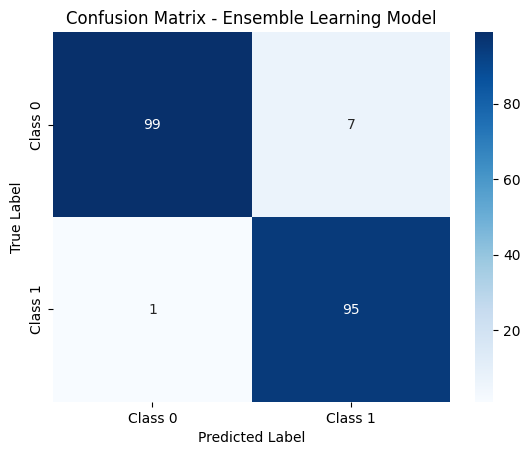

In [42]:
## Confusion Matrix for Ensemble model
ensemble_model_confusion_matrix = confusion_matrix(y_test, ensemble_model_predictions)

ensemble_model_confusion_matrix

## Creating the confusion matrix for the ensemble model
sns.heatmap(ensemble_model_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title('Confusion Matrix - Ensemble Learning Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()